In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm as anova
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from ISLP import load_data

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           7.03e-81
Time:                        02:49:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_6661/2795171104.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, mm.params[0]), slope=mm.params[1], color='red', label='Fitted line')


Text(0.5, 1.0, 'Least Square Regression Line')

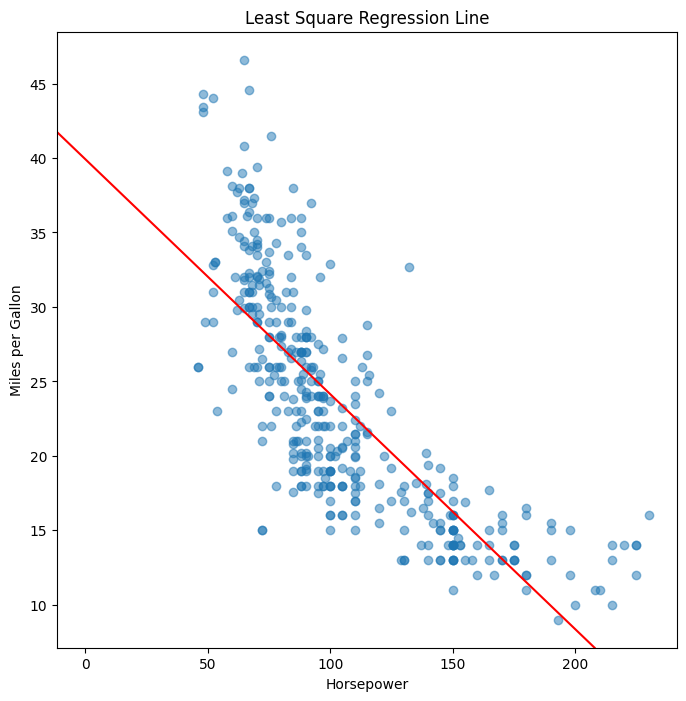

In [359]:
auto = load_data("Auto")
mm = smf.ols('mpg~ horsepower', data=auto).fit()
print(mm.summary())
A=mm.get_prediction(pd.DataFrame({'horsepower' : [98]})).summary_frame(alpha=0.5)
print(A)
# problem with plt.subplots(2, 2)
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(auto['horsepower'], auto['mpg'], alpha=0.5)
ax.axline((0, mm.params[0]), slope=mm.params[1], color='red', label='Fitted line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')
ax.set_title('Least Square Regression Line')




Q(8)(a)
(i)yes,since p value is 0 we reject the null hypothesis,and hence there is association b/w the predictor and the response 
(ii)60% of the variation is explanined by horsepower
(iii)negative
(iv)mean is 24.46

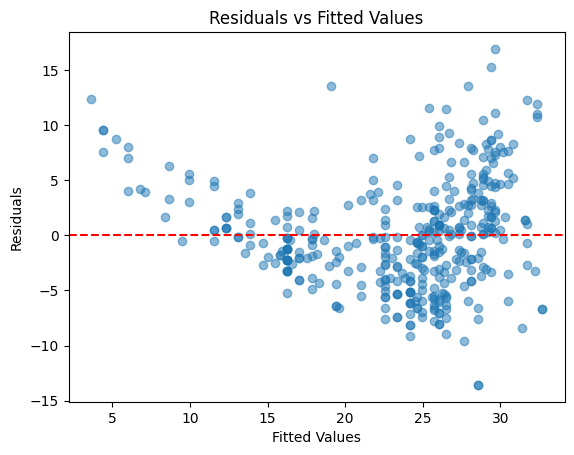

In [360]:
plt.scatter(mm.fittedvalues, mm.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


Q8(c)the variance is heterosedastic

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


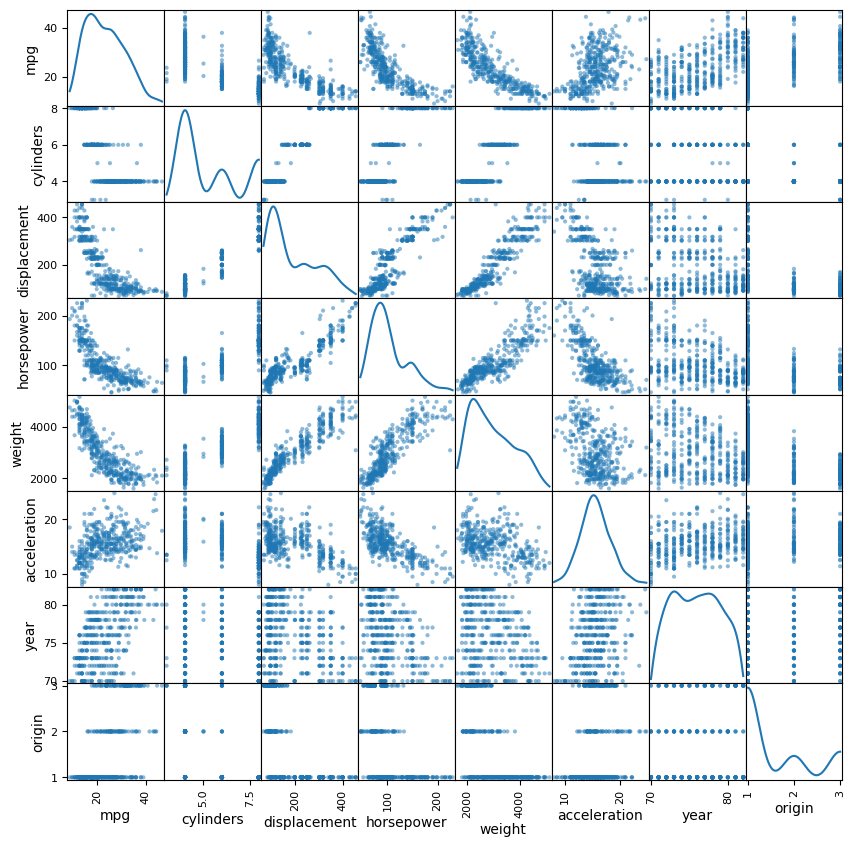

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

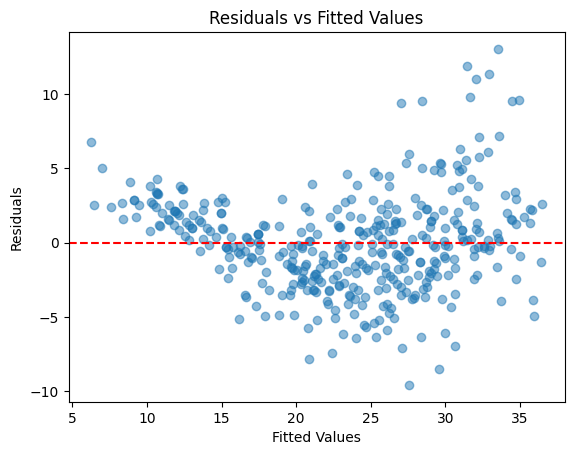

(392,)


array([13, 28])

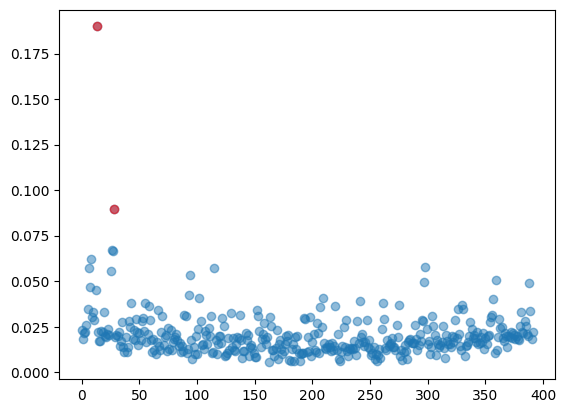

In [361]:
Auto = load_data("Auto")
print(Auto.columns)
Auto.drop(Auto[Auto.values == '?'].index ,inplace=True)


pd.plotting.scatter_matrix(Auto, alpha=0.5, figsize=(10, 10), diagonal='kde')
plt.show()


print(Auto.corr())
formula = 'mpg~'+'+'.join(Auto.columns)
print(formula)
mm1 = smf.ols(formula+'-mpg', data=Auto).fit()
print(mm1.summary())

significant = mm1.pvalues <= 0.05
print(significant[significant]== True)

print(anova(mm1))

plt.scatter(mm1.fittedvalues, mm1.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


high_leverage_point= mm1.get_influence().hat_matrix_diag
print(high_leverage_point.shape)
plt.scatter(np.arange(Auto.shape[0]), high_leverage_point, alpha=0.5)
x=np.where(high_leverage_point > 0.075)[0]
plt.scatter(x, high_leverage_point[x], color='red', alpha=0.5)
x

Q(9)(c)(i)except acceration all the variables are significant
(ii)intercept,displacement, weight,year,origin
(iii)change in 1 year lead to change in  0.7508units in mpg

(d)the variance is heteroscadestic, there are two points(13,28) with high leverage value
(f)log x transformation explains 84% if the variation in the data and the residual plot appears more homoscedastic



<class 'pandas.core.frame.DataFrame'>
mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin
0.8481977307095117
0.833848379191787
0.7980685272523486


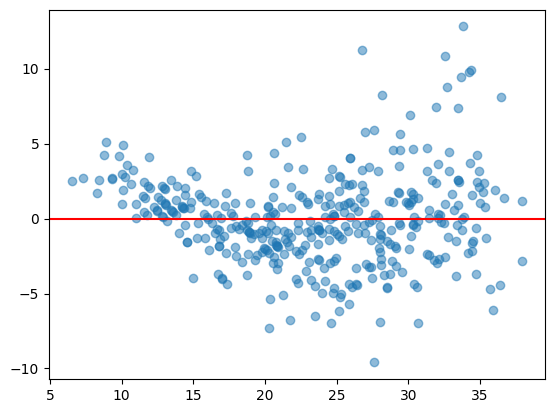

In [362]:
y= Auto['mpg']
x=Auto.drop('mpg', axis=1)
z1=np.log(x)
df1 = pd.concat([y,z1], axis=1)
df1= pd.DataFrame(df1)
print(type(df1))

c = z1.columns
formula = 'mpg~'+'+'.join(c)
print(formula)
mm2 = smf.ols(formula, data=df1).fit()
print(mm2.rsquared)
plt.scatter(mm2.fittedvalues,mm2.resid,alpha=0.5)
plt.axhline(0,color='red')

z2=np.sqrt(x)
df2 = pd.concat([y,z2], axis=1)
df2= pd.DataFrame(df2)
mm3 = smf.ols(formula, data=df2).fit()
print(mm3.rsquared)

z3=np.square(x)
df3 = pd.concat([y,z3], axis=1)
df3= pd.DataFrame(df3)
mm4 = smf.ols(formula, data=df3).fit()
print(mm4.rsquared)

Intercept    3.626602e-62
US[T.Yes]    4.860245e-06
Price        1.609917e-22
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           2.39e-23
Time:                        02:49:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

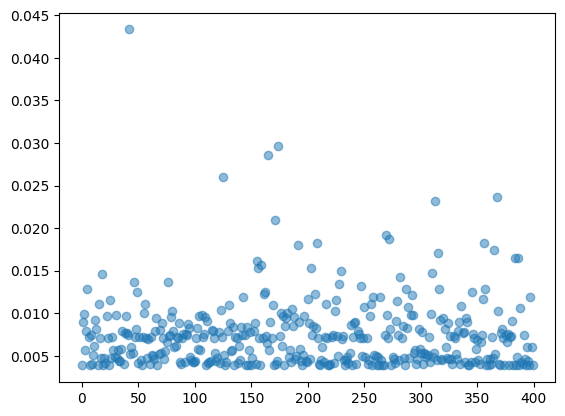

In [363]:
carseats = load_data("Carseats")
carseats.drop(carseats[carseats.values == '?'].index ,inplace=True)
carseats.head()
carseats.index
mm5 = smf.ols('Sales~Price+Urban+US', data=carseats).fit()
print(mm5.pvalues[mm5.pvalues < 0.05])
print(mm5.summary())
mm6= smf.ols('Sales~US+Price', data=carseats).fit()
print(mm6.summary())


print(mm6.conf_int(0.05))

high_leverage_point= mm6.get_influence().hat_matrix_diag
plt.scatter(np.arange(carseats.shape[0]), high_leverage_point, alpha=0.5)
print(np.where(high_leverage_point>0.040)[0])

Q10(b)There seems to be a statistically significant relationship between Sales and whether the store is in the US or not (and price).There does not seem to be significant relationship between Sales and wheter the store is in an urban or rural relationship 
(d)price,US
(f)there appear to be no improvement in the model e from model a
(h)row 42 appears to be outlier

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1972.
Date:                Sun, 20 Apr 2025   Prob (F-statistic):                    3.48e-67
Time:                        02:49:31   Log-Likelihood:                         -40.387
No. Observations:                 100   AIC:                                      82.77
Df Residuals:                      99   BIC:                                      85.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

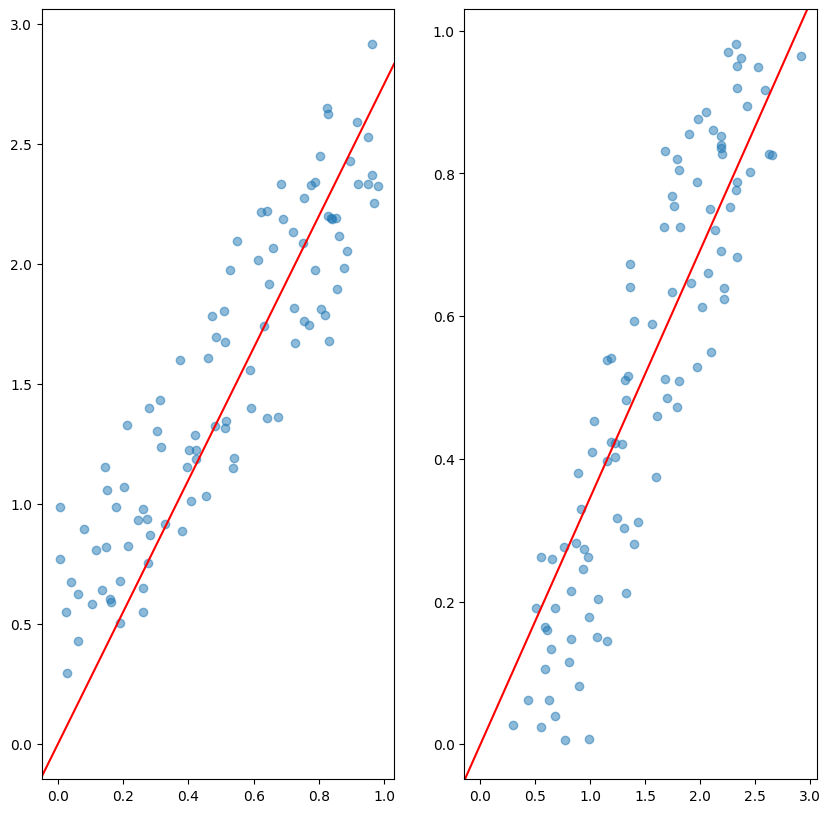

In [364]:
rng= np.random.default_rng(1)
x=rng.random(100)
y= 2*x + rng.random(100)


fig,ax= plt.subplots(1,2,figsize=(10,10))

# y onto x
mm7= smf.ols('y~x-1', data= pd.DataFrame({'x':x,'y':y})).fit()
print(mm7.summary())
ax[0].scatter(x, y, alpha=0.5)
ax[0].axline((0,0),slope=mm7.params.iloc[0], color='red', label='Fitted line');
# x onto y
mm8=smf.ols('x~y-1', data= pd.DataFrame({'x':x,'y':y})).fit()
print(mm8.summary())
ax[1].scatter(y,x, alpha=0.5)
ax[1].axline((0,0),slope=mm8.params.iloc[0], color='red', label='Fitted line');

# correlation coeff
print('correlation is',np.corrcoef(x,y)[0][1])
print(type(mm7.params.iloc))

Q11(a)beta is 2.7513 , SE is 0.062 ,pvalue= 0.000
(b) beta=0.3461    ,SE=  0.008     ,pvalue=      0.000 
(c)bxy*byx=rsquare(correlation coefficent)


In [365]:
# t statistics for y onto x
round(mm7.tvalues.iloc[0],2)==round((np.sqrt(100-1)*np.sum(x*y))/(np.sqrt((np.sum(x**2))*(np.sum(y**2))-(np.sum(x*y)**2))),2)

True

Q12(A)(a)when there is perfect linear relationship (1 or -1)


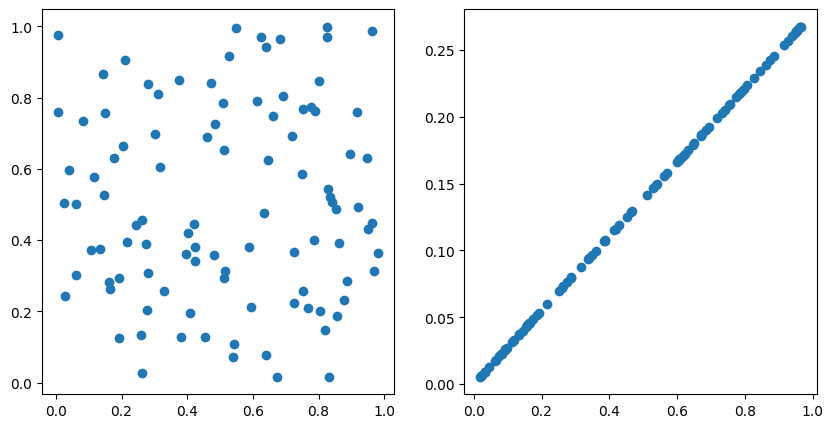

In [366]:
rng= np.random.default_rng(1)
fig,ax=plt.subplots(1,2,figsize=(10,5))

# different correlation coefficent
x=rng.random(100)
y=rng.random(100)
ax[0].scatter(x,y)


# same correlation coefficient
x=rng.random(100)
y=rng.random(1)*x
ax[1].scatter(x,y)


Q13(g)no,quadratic term does not improve the 
(j)increasing noise leads to increase in confidence interval

Intercept   -1.019006
x            0.492146
dtype: float64 

Intercept      -1.018189
x               0.491568
np.square(x)   -0.001177
dtype: float64 

                  0         1
Intercept -1.068891 -0.969122
x          0.433783  0.550508 
                      0         1
Intercept    -1.077301 -0.959077
x             0.428874  0.554262
np.square(x) -0.046243  0.043889 
 
 

Intercept   -1.007603
x            0.496858
dtype: float64 

Intercept      -1.007276
x               0.496627
np.square(x)   -0.000471
dtype: float64 

                  0         1
Intercept -1.027556 -0.987649
x          0.473513  0.520203 
                      0         1
Intercept    -1.030920 -0.983631
x             0.471550  0.521705
np.square(x) -0.018497  0.017556 
 
 

Intercept   -1.060820
x            0.474866
dtype: float64 

Intercept      -1.058204
x               0.473018
np.square(x)   -0.003767
dtype: float64 

                  0         1
Intercept -1.220451 -0.901190
x          0.288105  

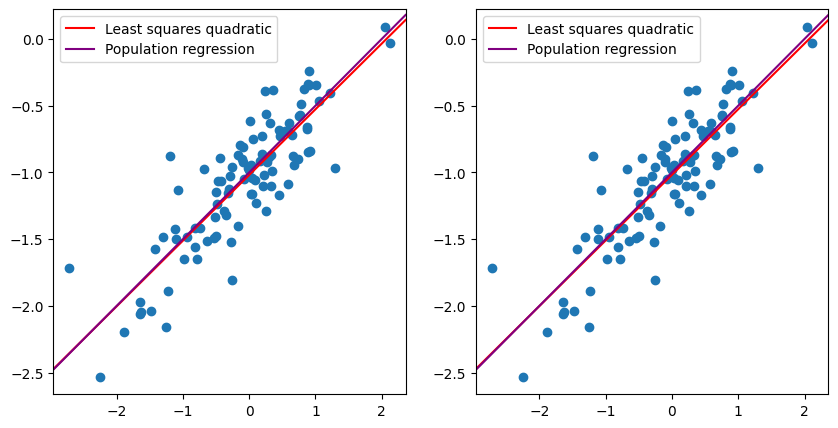

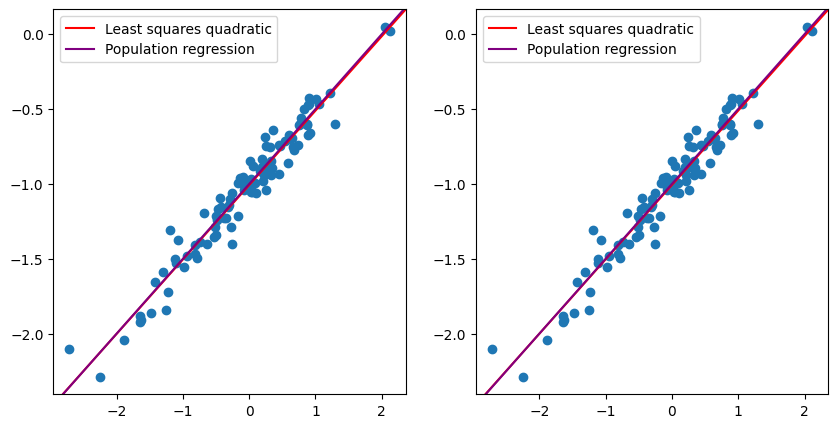

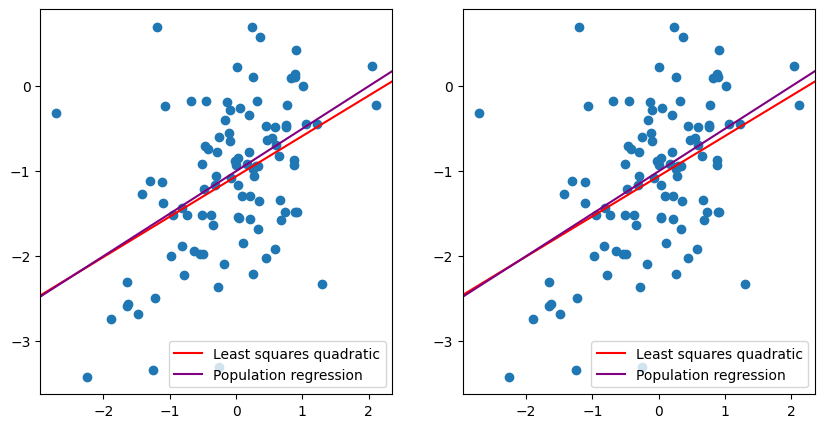

In [367]:
def eps(a):
    rng=np.random.default_rng(1)
    x=rng.standard_normal(100)
    eps=rng.normal(0,a,100)
    y=-1+0.5*x+eps
    len(y)
    # bo is -1 and b1 is 0.5
    # scatterplot
    fig,ax=plt.subplots(1,2,figsize=(10,5))

    # least square fit
    mm9=smf.ols('y~x',data=pd.DataFrame({'x':x,'y':y})).fit()
    print(mm9.params,'\n')
    ax[0].scatter(x,y,label='_nolegend_')
    ax[0].axline((0,mm9.params.iloc[0]),slope=mm9.params.iloc[1],color='red')
    ax[0].axline((0,-1),slope=0.5,color='purple')
    ax[0].legend(['Least squares quadratic', 'Population regression']);

    # x square fit
    mm10=smf.ols('y~x+ np.square(x)',data=pd.DataFrame({'x':x,'y':y})).fit()
    print(mm10.params,'\n')
    ax[1].scatter(x,y,label='_nolegend_')
    ax[1].axline((0,mm10.params.iloc[0]),slope=mm10.params.iloc[1],color='red')
    ax[1].axline((0,-1),slope=0.5,color='purple')
    ax[1].legend(['Least squares quadratic', 'Population regression']);
    plt.show;
    print(mm9.conf_int(0.05),'\n',mm10.conf_int(0.05),'\n','\n','\n')
# normal noise
eps(0.25)
# low noise
eps(0.1)
# high noise
eps(0.80)

Q14(a)b0=2,b1=2,b2=0.3
(c)yes we reject the null hypothesis b1=0, since p value is >0.05 we accept the null hypothesis, hence b1 is statistically significant but b2 is not
(d)yes we can reject the null hypothesis, hence x1 is significant
(e)yes we can reject the null hypothesis, hence x2 is significant
(f)This contradiction is due to the collinearity of x1 and x2 which causes an increased standard error for all when our model incorporates both features, which in turn increases the p-values and causes us to incorrectly accept the null hypothesis when our model uses both features.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           5.76e-08
Time:                        02:49:31   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

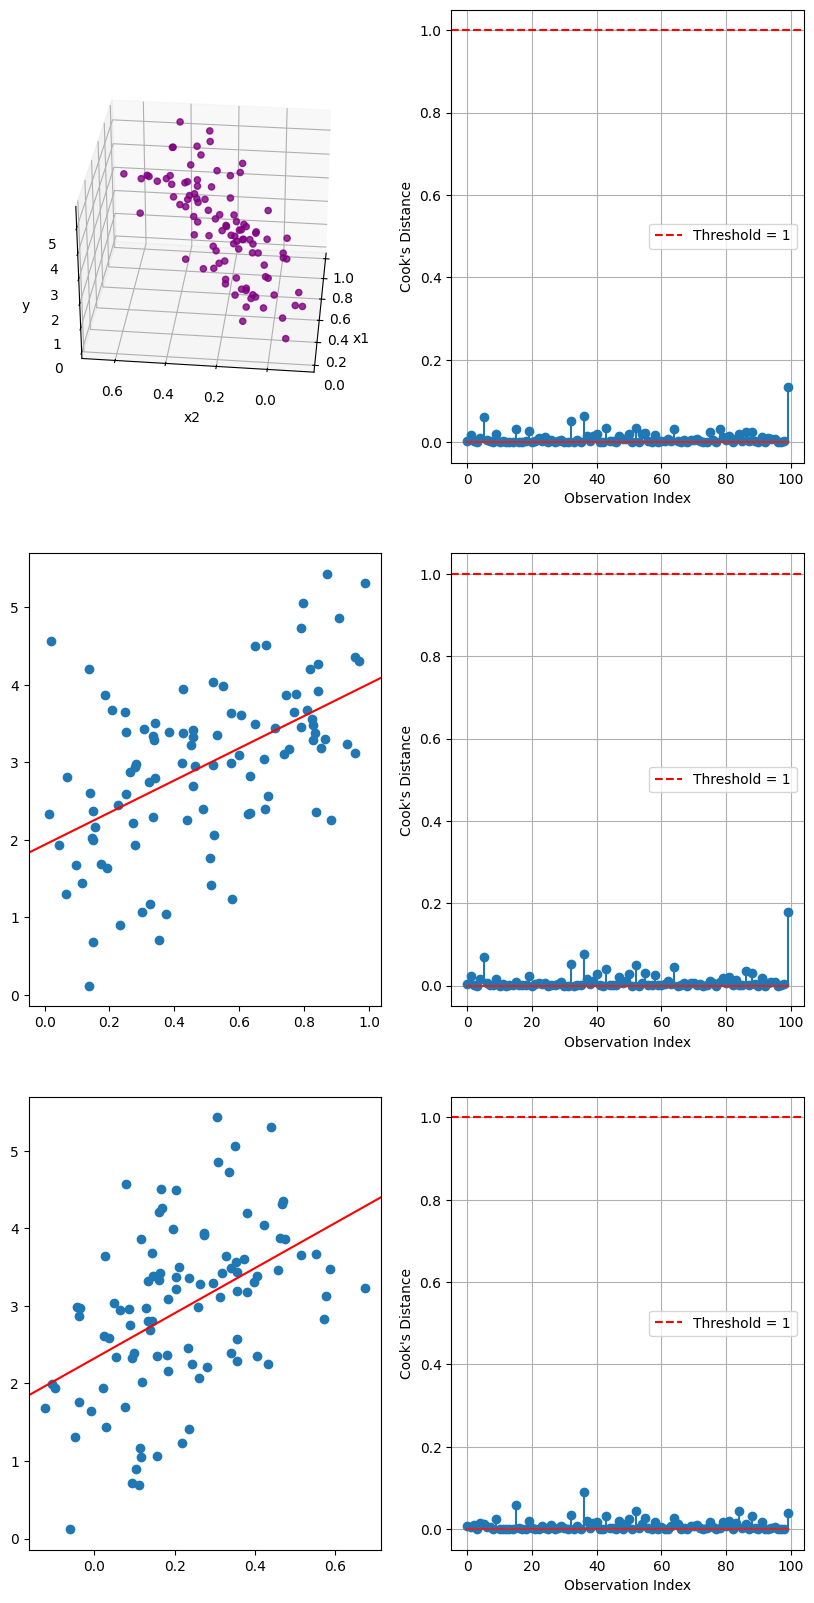

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           4.60e-08
Time:                        02:49:31   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0618      0.192     10.720      0.0

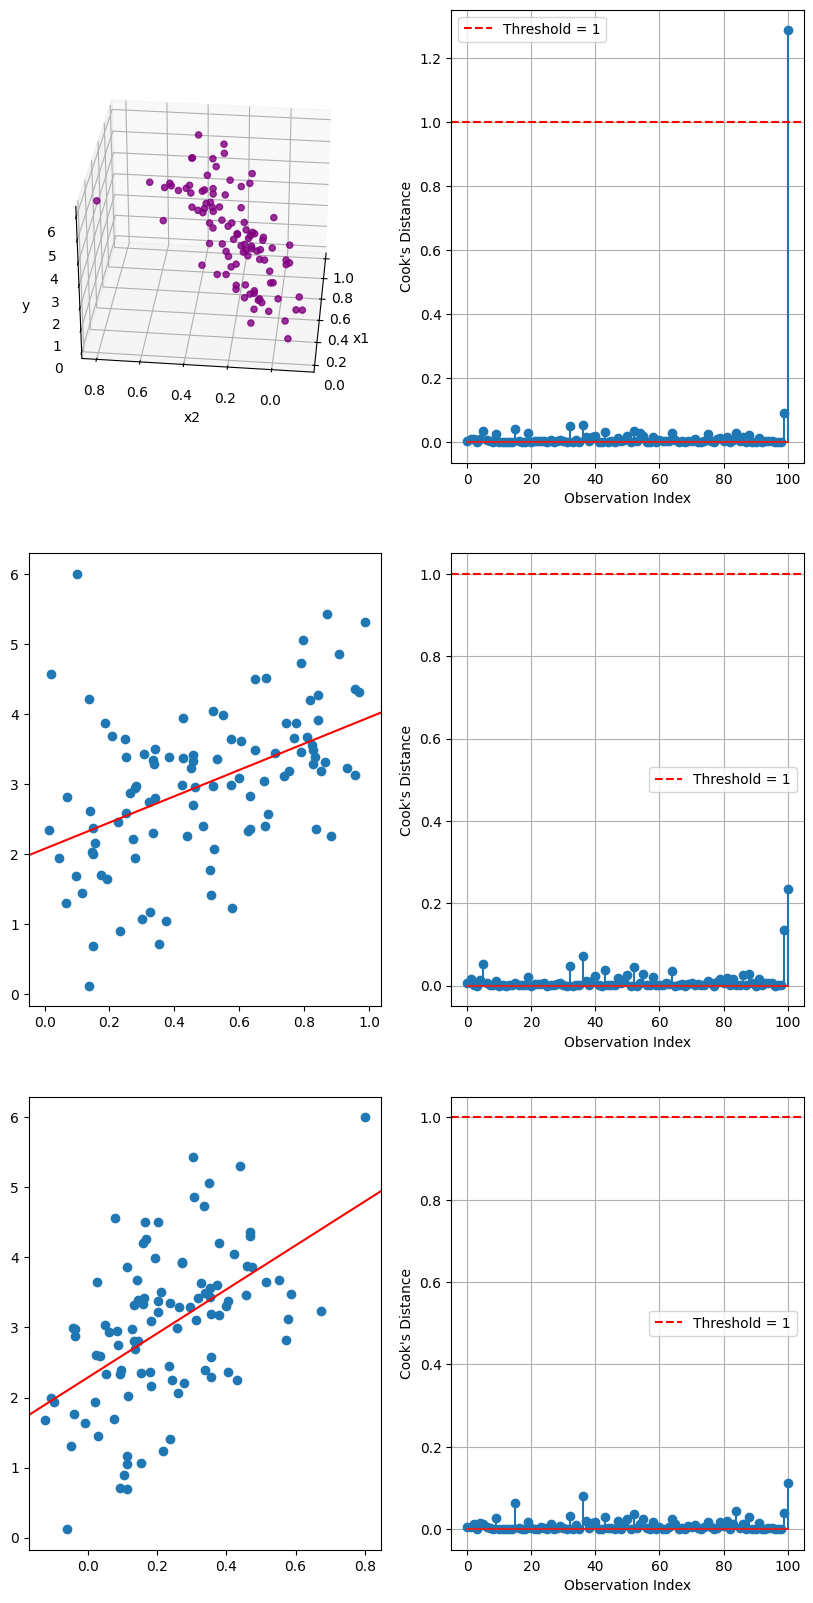

In [368]:
rng = np.random. default_rng (10)

def regession(x1,x2,y):
    df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
    
    
    # Plot
    # setting a blank canvas for plotting 
    fig = plt.figure(figsize=(10,20))

    # Fit x1 and x2
    f = 'y ~ x1 + x2'
    mm11 = smf.ols(formula=f, data=df).fit()
    print(mm11.summary())
    # adding subplot to the canvas with 111 being 1 row 1 column and  last number indicate the position of subplot , without specifying projection it will plot in 2d 
    # 111 is a 3d subplot
    ax1 = fig.add_subplot(321, projection='3d')
    ax1.scatter(df['x1'], df['x2'], df['y'],alpha=0.8,color='purple')
    ax1.view_init(30, 186)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')

    influence = mm11.get_influence()
    cooks = influence.cooks_distance[0]

    ax2= fig.add_subplot(322)
    ax2.stem(range(len(cooks)), cooks, markerfmt="o")
    ax2.axhline(y=1, color='r', linestyle='--', label="Threshold = 1")
    ax2.set_xlabel('Observation Index')
    ax2.set_ylabel("Cook's Distance")
    ax2.set_label("Cook's Distance for Each Observation")
    ax2.legend()
    ax2.grid(True)
    
    # fitting using x1
    mm12=smf.ols(f+'-x2', data=df).fit()
    print(mm12.summary())

    ax3= fig.add_subplot(323)
    ax3.scatter(x1,y)
    ax3.axline((0,mm12.params.iloc[0]),slope=mm12.params.iloc[1],color='red')
    
    influence = mm12.get_influence()
    cooks = influence.cooks_distance[0]
    
    ax3= fig.add_subplot(324)
    ax3.stem(range(len(cooks)), cooks, markerfmt="o")
    ax3.axhline(y=1, color='r', linestyle='--', label="Threshold = 1")
    ax3.set_xlabel('Observation Index')
    ax3.set_ylabel("Cook's Distance")
    ax3.set_label("Cook's Distance for Each Observation")
    ax3.legend()
    ax3.grid(True)


    # fitting using x2
    mm13=smf.ols(f+'-x1', data=df).fit()
    print(mm13.summary())

    ax4= fig.add_subplot(325)
    ax4.scatter(x2,y)
    ax4.axline((0,mm13.params.iloc[0]),slope=mm13.params.iloc[1],color='red')

    influence = mm13.get_influence()
    cooks = influence.cooks_distance[0]

    ax4= fig.add_subplot(326)
    ax4.stem(range(len(cooks)), cooks, markerfmt="o")
    ax4.axhline(y=1, color='r', linestyle='--', label="Threshold = 1")
    ax4.set_xlabel('Observation Index')
    ax4.set_ylabel("Cook's Distance")
    ax4.set_label("Cook's Distance for Each Observation")
    ax4.legend()
    ax4.grid(True)
    
    
    plt.show() 
   


x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)
regession(x1,x2,y)
x1 = np. concatenate ([x1 , [0.1]])
x2 = np. concatenate ([x2 , [0.8]])
y = np. concatenate ([y, [6]])
regession(x1,x2,y)




In [369]:
# Q15
boston=load_data('Boston')
boston.columns
x=boston.columns.drop('crim')
y=boston['crim']
A=[]
for i in range(len(x)):
    f='y~'+(x[i])
    mm13=smf.ols(f,data=boston).fit()
    print(mm13.pvalues)
    if mm13.pvalues.iloc[1]>0.05:
        print('there is no association between y and',x[i],'\n')
        
    else:
        print('there is association between y and',x[i],'\n')
        A.append(x[i])
    
print(A)

Intercept    4.037668e-24
zn           5.506472e-06
dtype: float64
there is association between y and zn 

Intercept    2.091266e-03
indus        1.450349e-21
dtype: float64
there is association between y and indus 

Intercept    1.239505e-19
chas         2.094345e-01
dtype: float64
there is no association between y and chas 

Intercept    5.076814e-15
nox          3.751739e-23
dtype: float64
there is association between y and nox 

Intercept    2.272000e-09
rm           6.346703e-07
dtype: float64
there is association between y and rm 

Intercept    7.221718e-05
age          2.854869e-16
dtype: float64
there is association between y and age 

Intercept    1.502748e-33
dis          8.519949e-19
dtype: float64
there is association between y and dis 

Intercept    3.605846e-07
rad          2.693844e-56
dtype: float64
there is association between y and rad 

Intercept    2.773600e-23
tax          2.357127e-47
dtype: float64
there is association between y and tax 

Intercept    3.395255e-0